<a href="https://colab.research.google.com/github/JeppeFLarsen/BID-M1-OOP/blob/main/BID1_NETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dagens (ekstra) litteratur, hvis man vil arbejde videre med det.


- https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2595287
- https://medium.com/@EthnographicMachines/introduction-to-controversy-mapping-6961f03f9a8a
- https://medium.com/@EthnographicMachines/mapping-controversies-with-digital-methods-scrapers-crawlers-apis-17e0c96c340a
- https://medium.com/@EthnographicMachines/visual-network-analysis-with-gephi-d6241127a336

# Introduktion og dagens program

I dag skal vi have vores første indblik i netværksanalyse – en metode, som er valgt med henblik på dens potentielle relevans for flere af jer i forbindelse med kommende semesterprojekter. Denne relevans vil jeg illustrere ved at gennemgå følgende punkter:

- Hvorfor netværksanalyse kan bruges til at besvare specifikke spørgsmål og
give indsigter, som kvalitative metoder ofte ikke kan levere.
- Den grundlæggende struktur og logik i relationel data, og hvordan det knytter sig til nogle af de programmerings- og applikationsprincipper, vi tidligere har gennemgået.
- Hvordan I opbygger graf-objekter.
- Hvordan I analyserer graf-objekter.
- Hvordan I visualiserer netværksdata.





# Programmeringsparadigmer (igen!!)

Relevant meta-reflektion når vi bevæger os over i dataanalyse-verdenen, da det har betydning for hvordan vi håndterer data og udfører analyser.

## Objektorienteret (OOP) vs. funktionel (FP) i en kontekst af dataanalyse



# **OOP: strukturering af kode, data, og funktioner**

Som vi så i de sidste lektioner, kan vi strukturere vores data i relevante `klasser`, hvor hver `klasse` har specifikke `attributter`, og vi kan tilføje `metoder` til at tilgå og ændre denne data. I en analysekontekst kan denne strukturering give mening, da dataen (`attributterne`) og de `metoder`, der kan anvendes på denne data, "pakkes sammen" i et `objekt`. Dette står i kontrast til **funktionel programmering** (**FP**), som vi diskuterer nedenfor.

Grundlæggende betyder det, at dataen kun kan tilgås eller ændres via de *kontrollerede metoder*, der er defineret i objektet, og ikke direkte fra ekstern kode (igen i modsætning til **FP**). I en analyse kontekst kan det være metoder til databehandling (fx filtrering baseret på bestemte attributter eller underklasser) og metoder til analyse (fx beregning af statistiske mål for attributterne).

Denne tilgang giver en mere struktureret og kontrolleret behandling af data, hvor du eksplicit skal vælge at ændre eller manipulere dataen gennem de angivne metoder.

For eksempel kunne vi definere en metode, der beregner gennemsnitsværdien for en bestemt attribut inden for en klasse. Denne klasse kunne kaldes  `data_analyse` og metoden for `calculate_mean()`:






In [ ]:
class data_analyse:
    def __init__(self, data): # Initialiserer objektet med den data, der er relevant for vores analyse.
        self.data = data      # data defineres og tilskrives klassen nedenfor.

    def calculate_mean(self): # Klasse-specifik metode, der har "tilladelse" til at tilgå objektets data via self, der forbinder objekt og metode.
        return sum(self.data) / len(self.data) # Matematisk formel til at udregne gennemsnit. return "returnerer" resultaten af udregningen når metode er kørt.

data = [1, 2, 3, 4, 5] # Manuel bestemt data. Prøv at ændre den, for at se hvad der sker.
analyse_objekt = data_analyse(data) # Tilskriver/giver denne data til vores klasse `data_analyse`
gennemsnit = analyse_objekt.calculate_mean() # Anvender den indbyggede metode til både at tilgå og ændre/udregne et output (gennemsnittet af data)
print(gennemsnit) # Printer den information, der er gemt i vores variabel `gennemsnit`, defineres på linjen over.

3.0


In [ ]:
print(analyse_objekt.data)

[1, 2, 3, 4, 5]



***Opsummeret i generelle termer:*** I et objektorienteret programmeringsparadigme definerer vi `objekter` og `klasser`, som repræsenterer særlige `datastrukturer`, og `metoder` knyttes direkte til disse klasser.

I eksemplet ovenfor har vi defineret en klasse kaldet `data_analyse`, som indkapsler både data og de relevante `metoder`. Det betyder, at hvis vi ønsker at udregne gennemsnittet af en attribut i `data_analyse`, skal vi bruge den definerede metode `calculate_mean()`. Vi kan altså ikke benytte andre indbyggede eller brugerdefinerede metoder til at bestemme gennemsnittet direkte på dataen.

Pointen med eksemplet er at vise, hvordan **OOP** kan bruges til at organisere både kode og data. Denne tilgang har både fordele og ulemper i forhold til andre programmeringsparadigmer:

- Strukturering og organisering af data og metoder gør koden lettere at overskue og vedligeholde, især når der arbejdes med større projekter over længere tid.
- Ved at indkapsle data og metoder i objekter beskytter vi vores analyse mod utilsigtede fejl. Dette er særligt relevant, når flere personer arbejder på projektet.
- På den anden side kan den ekstra kompleksitet, som OOP tilføjer, være unødvendig, især i simple analyser, hvor få personer er involveret, eller hvor projektet har en kort levetid. I sådanne tilfælde kan OOP være *overkill*, og enklere metoder kan være mere effektive.
- For mange er OOP sværere at lære og anvende sammenlignet med fx funktionel programmering (**FP**). I starten af ens læringsproces kan man derfor opleve, at klasser og objekter ikke anvendes effektivt i analytiske opgaver. Men det er på sigt værd at investere tid i at lære det!
- Dårligt gennemtænkt OOP-kode kan føre til unødig kompleksitet og skabe ekstra *overhead*. Dette kan gøre koden langsommere og sværere at navigere i, især når ændringer er nødvendige (*som vi så i den tidligere øvelse*).




# **Funktionel programmering: ren og direkte input/output analse**

Hvor **OOP** er centreret omkring `klasser` og `objekter`, er funktionel programmering (**FP**) fokuseret på `funktioner`. I FP er det funktionerne, der bruges til at transformere eller analysere data (det, der i OOP ville være metoder knyttet til objekter). Grundlæggende tager funktioner et `input` og returnerer et `output`.

I modsætning til **OOP**, hvor data og metoder er tæt bundet sammen i klasser, giver FP en meget mere fleksibel tilgang til databehandling. Her behøver vi ikke at definere specifikke metoder til bestemte klasser; i stedet kan vi tage hele datasættet som input til en funktion uden for en klasse eller objekt for at opnå det ønskede output, fx:


In [ ]:
def calculate_mean(data):
    return sum(data) / len(data)

data = [1, 2, 3, 4, 5]
gennemsnit = calculate_mean(data)
print(gennemsnit)


3.0


I **OOP** arbejder vi typisk med `objekter`, der kan ændres løbende ved hjælp af dedikerede `metoder`. I funktionel programmering (**FP**) betragtes data derimod som *uforanderlig*. Det vil sige, at hvis vi ønsker at tilføje ny data til eksisterende data, skaber vi en ny datastruktur/datasæt, der indeholder både den oprindelige data og den nye information. **FP** er dermed dataflow-orienteret, hvilket betyder, at vi kan følge, hvordan data ændres gennem hele analysen. Med andre ord ændrer vi ikke den oprindelige data direkte, men skaber i stedet nye versioner af data undervejs.

### Højereordensfunktioner

Et centralt koncept i **FP** er *højereordensfunktioner*. Disse er funktioner, der enten kan tage andre funktioner som argumenter (fx en funktion, der anvender en anden funktion på en række data – ***det mest relevante for jer nu***) eller returnerer en anden funktion som output (fx en funktion, der genererer en multiplikationsfunktion – ***mindre relevant lige nu, da abstraktionsniveauet bliver lige højt nok***).

I Python vil I især støde på højereordensfunktioner i form af `lambda`, som fremmer en funktionel programmeringsstil ved at gøre koden mere generel og ofte kortere, hvilket kan forbedre læsbarheden.

`lambda` bruges til at oprette "anonyme" funktioner, hvilket vil sige funktioner uden navn. De bruges typisk, når funktionen kun skal udføre en enkelt mindre opgave og ikke behøver at blive kaldt flere gange senere i koden.

### `lambda` syntaks:

```
lambda arguments: expression
```

1. `arguments`: De inputparametre, som funktionen modtager (kan være flere, adskilt med komma).
2. `expression`: Et enkelt udtryk/metode/funktion, som evalueres og returneres.

### Eksempler:


In [ ]:
lige_tal = list(filter(lambda x: x % 2 == 0, data)) # `filter` intererer henover alle elementer i `data` og filterer kun de data, der matcher logikken i `lambda` funktionen.
print(lige_tal)

I koden filtrerer vi kun de lige tal fra `data`. `Lambda`-funktionen `lambda x: x % 2 == 0` returnerer `True`, hvis `x` er lige, og `False` ellers.

In [ ]:
data = [1, 2, 3, 4, 5]
kvadrater = list(map(lambda x: x * x, data)) # `map` intererer henover alle elementer i `data` og anvender funktionen defineret i `lambda`.
print(kvadrater)

[1, 4, 9, 16, 25]


I koden tager `lambda`-funktion `lambda x: x * x` et tal `x` som input og returnerer dets kvadrat (tallet gange sig selv).

### I en ren OOP-tilgang, kunne det fx skrives som:



In [ ]:
class data_analyse:
    def __init__(self, data):
        self.data = data

    def kvadrer(self):
        kvadrater = []
        for x in self.data:
            kvadrater.append(self._kvadrer_element(x))
        return kvadrater

    def _kvadrer_element(self, x):
        return x * x

data = [1, 2, 3, 4, 5]
analyse_data_obj = data_analyse(data)
kvadrater = analyse_data_obj.kvadrer()

print(kvadrater)


[1, 4, 9, 16, 25]


In [ ]:
analyse_data_obj.data

[1, 2, 3, 4, 5]


## "Rene" funktioner og uforanderlig data - en gentagelse.

I lærebøger om funktionel programmering (**FP**) støder man ofte på begreber som "*rene funktioner som byggesten*" og "*uforanderlig data*". Disse begreber står (delvist) i kontrast til objektorienteret programmering (**OOP**).

Disse koncepter giver først for alvor mening, når I begynder at skrive kode og arbejde med det over tid. Men grundlæggende betyder "rene funktioner", at funktionerne er *deterministiske*. Det vil sige, at `output` udelukkende afhænger af `input`, og funktionerne ændrer ikke på noget uden for sig selv, såsom `attributter` i en klasse. Argumentet i grundbøgerne er, at dette gør koden nemmere at reproducere, forstå og debugge, da resultaterne altid er forudsigelige, hvis input er det samme.

Derudover betyder det, at vi i FP bruger funktioner til at *transformere data*. I stedet for at ændre de oprindelige datastrukturer, skaber vi nye datasæt ved at anvende transformationer:

- I **OOP** ændrer nogle metoder data direkte, såsom "setter"-metoder, og metodernes funktionalitet kan afhænge af den klasse, de er knyttet til.
- I **FP** opfordres der til at bruge *uforanderlige datastrukturer*, fordi det kan gøre det lettere at forstå dataflowet i en analyse og forhindre utilsigtede ændringer i data undervejs.

Biblioteker som `NumPy` og `Pandas` er eksempler på samlinger funktioner, der tilbyder funktionalitet, der passer ind i dette paradigme. (`Pandas` vil vi gemme til næste workshop.)

### Et eksempel:


In [ ]:
import numpy as np
resultat = np.mean(data, axis=0)  # Intet i data ændres og vi tilgår data direkte med en *ekstern* funktion
print(resultat)

3.0



Det samme princip gælder i det tidligere eksempel:

```
kvadrater = list(map(lambda x: x * x, data))
```

I koden ovenfor skaber vi en ny variabel, `kvadrater`, som indeholder den transformerede data (i dette tilfælde kvadraterne af værdierne i `data`). Vi ændrer ikke den oprindelige data i `data`. (Sammenlign dette med **OOP**-tilgangen i en tidligere lektion, hvor vi ændrede den oprindelige data ved hjælp af getter- og setter-metoder).

## Dataflow-orienteret tilgang (*samlebåndsanalogi*)

Vi kan forstå denne proces som en *dataflow-orienteret* tilgang, hvor vi ikke ændrer den oprindelige data, men i stedet skaber nye datasæt baseret på de oprindelige. Dette giver os mulighed for at følge, hvordan dataen udvikler sig gennem analysen.

Med andre ord, i **FP** fokuserer vi på at bruge rene funktioner til at transformere data, uden at ændre den oprindelige data. (Tænk over forskellen på, hvordan `calculate_mean()` blev præsenteret i henholdsvis **OOP** og **FP**.)
Denne tilgang har dog også både fordele og ulemper:

- Den funktionelle tilgang gør det muligt at holde funktionerne simple og fokuserede, hvor hver funktion kun har én opgave. Dette kan gøre koden nemmere at forstå og navigere i. (Efter dagens workshop kan I reflektere over, om I synes, dette er en fordel i forhold til **OOP**-koden, I arbejdede med tidligere.)
- Da dataen betragtes som uforanderlig, bliver det lettere at spore ændringer gennem analyseforløbet. Sammenlign det med et samlebånd, hvor man kan se, hvad der sker i hvert trin af analysen.
- En ulempe ved denne tilgang er dog, at det kan resultere i mange mellemtrin og "del-datasæt", som kan påvirke ydeevnen negativt, især ved store datamængder.


## Opsummering

**OOP** er særligt velegnet, når vi arbejder med objekter, deres tilstand (attributter) og interaktionen mellem klasser eller objekter. **FP** er derimod ideelt, når datatransformation er i fokus, og målet er at bearbejde data med matematiske metoder/modeller. Begge paradigmer har deres styrker og svagheder, og i moderne dataanalyse anvendes ofte elementer fra begge. Vægtningen mellem de to afhænger af analysens formål, kompleksitet og personlige præferencer.

Som vi vil se i dag, kan **netværksanalyse** trække på begge paradigmer. Vi vil også se, hvordan vi kan anvende **API**'er til at udnytte, at andre har struktureret deres data på **backenden** (typisk **OOP**-inspireret), for derefter at bearbejde og analysere denne data med en mere **FP**-orienteret tilgang.




# *Networks* og relationel data

Netværksanalyse anvendes grundlæggende til at undersøge forholdet (eller relationerne) mellem *entiteter* (**nodes**) og deres *forbindelser* (**edges**) i et givent *system*. Lingoen kommer fra både **systemteori** og **grafteori**.

`Nodes` (noder) repræsenterer entiteter: fx personer, hjemmesider, ord, links, blogs osv. (mulighederne er kun begrænset af jeres kreativitet).

`Edges` (kanter) repræsenterer relationen mellem to (eller flere) entiteter: fx venskaber, at to personer sidder i samme bestyrelse, et hyperlink mellem to Wikipedia-artikler, transaktioner og så videre.

Det grundlæggende princip i `relationel data` er, at vi ikke primært fokuserer på de isolerede egenskaber ved datapunkterne, men derimod på forbindelserne mellem dem. Eksempler på relationel data:

- *Relationer mellem personer*
    - **Slægtskab**: mor til, gift med ...
    - **Roller**: chef for, vejleder for ...
    - **Affektive**: kan lide, stoler på ...
    - **Interaktion**: giver råd, taler med, retweeter ...
    - **Tilknytning**: tilhører samme klubber, deler samme interesser ...

- *Relationer mellem organisationer*
    - Som virksomhedsenheder: joint ventures, strategiske alliancer ...
    - Køber fra/sælger til, leaser til, outsourcer til ...
    - Ejer aktier i, datterselskab af ...
    - Via deres medlemmer (personaleudveksling, venskab...)


### Opsummering
Et netværk er i sin mest rene form et system af elementer, der er forbindet med nogle systemspecifikke relaitoner: Nogle kalder også det samlede netværk for en graf (**graph**). *Et netværk er en repræsentation af relationel data. *



# Relationelle datastrukturer

En første sidebemærkning er, at vi i dag skal arbejde med [`networkx`](https://networkx.github.io/documentation/stable/index.html)-biblioteket, som er blevet de facto standarden for netværksanalyse i Python. Der findes andre pakker, såsom [`igraph`](https://igraph.org/python/), som også er populær i både Python og R. Det har eftersigende stor ydeevne ved store relationelle datastrukturer. Men da networkx er den mest udbredte, starter vi med at bruge dette bibliotek.



In [ ]:
!pip install networkx

## Edgelist

Det centrale element i en netværksdatastruktur er en `edgelist`, hvor hver **edge** (kant) definerer et par af **nodes** (noder). Datastrukturen består som minimum af to kolonner: én kolonne med noder (**source**) og en anden kolonne med de noder, der er forbundet til den første node (**targets**). Hver node og hvert nodepar er identificeret med unikke ID'er.

Hver række i en `edgelist` indeholder således et ID i den første kolonne og et ID i den anden kolonne, som angiver en *forbindelse* mellem de to noder. En `edgelist` kan også indeholde yderligere information i andre kolonner, der beskriver attributter for hver edge, såsom "styrken" af forbindelsen. Hvis sådanne ekstra data er til stede, kalder vi netværket for **`vægtet`**.

Hvis der er en meningsfuld forskel på, hvilken node der er **source** og hvilken der er **target**, betegner vi netværket som `directed`. Hvis der ikke er forskel, eller hvis det ikke kan observeres, kalder vi netværket **`undirected`**.

Nedenfor er et minimalt eksempel på en manuelt oprettet edgelist, som er **`ikke-vægtet`** og **`undirected`**:

In [ ]:
import networkx as nx

# Et tomt graf-objekt. Konventionen i networkx pakken er at kalde det "G"
G = nx.Graph()

# Tilføj edges mellem noder (A, B, C, D)
G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('C', 'D')
G.add_edge('D', 'A')
G.add_edge('A', 'C')

# Konverter den "rå" edgelist som en liste
edgelist = list(G.edges())

# Print edgelisten
print(edgelist)

# Frivillig og kontekst specifik: gem vores edgelist som .csv (eller andet format)
nx.write_edgelist(G, "edgelist.csv", delimiter=",")


[('A', 'B'), ('A', 'D'), ('A', 'C'), ('B', 'C'), ('C', 'D')]


In [ ]:
print(G)

Graph with 4 nodes and 5 edges


Outputtet betyder at der er relationer mellem:

- A og B
- A og D
- A og C
- B og C
- C og D

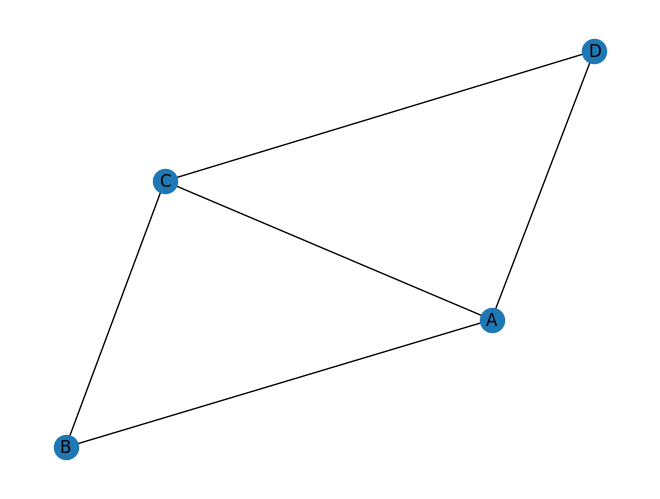

In [ ]:
import matplotlib.pyplot as plt

# Visualiser grafen
nx.draw(G, with_labels=True)
plt.show()

## Graph object

Graf-objekter er en datastruktur, der relaterer til den logik, vi diskuterer i forbindelse med **OOP**. Graf-objektet har nogle særegenheder, der adskiller det fra "klassisk" tabeldata, såsom dataframes, som vi vil arbejde med næste gang i `Pandas`.

Det centrale og særlige ved grafdata er:

- Afhængighed mellem observationer: I en relationel datastruktur er der en dyb forbindelse mellem observationerne.
    - Hvis vi fjerner én `node`, kan det betyde, at `edge(s)` også fjernes.
    - Relationerne kan være så dybe, at fjernelsen af en `node` ikke kun påvirker de direkte relationer, men kan have konsekvenser for hele netværket, hvis den fjernede `node` er central (mere herom senere).
    - Dette står i kontrast til *tabeldata* (tænk Excel-data), hvor værdierne i datastrukturen er (matematisk) uafhængige.

Af disse grunde definerer Python-biblioteker deres egne `graf-objekter`, som strukturerer information om både `noder` og `edges`, samt eventuelle yderligere `attributter`. Dette muliggør analyser af data, der tager højde for relationerne mellem observationerne.










In [ ]:
import networkx as nx

# Et graf-objekt. Konventionen i networkx pakken er at kalde det "G"
G = nx.Graph()

# Tilføj edges mellem noder (A, B, C, D) (setter-metoder indbygget i biblioteket)
G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('C', 'D')
G.add_edge('D', 'A')
G.add_edge('A', 'C')

# Print information om grafen (getter-metoder indbygget i biblioteket)
print("Nodes i grafen:", G.nodes())
print("Edges i grafen:", G.edges())
print("Antal nodes:", G.number_of_nodes())
print("Antal edges:", G.number_of_edges())

Nodes i grafen: ['A', 'B', 'C', 'D']
Edges i grafen: [('A', 'B'), ('A', 'D'), ('A', 'C'), ('B', 'C'), ('C', 'D')]
Antal nodes: 4
Antal edges: 5


# Netværkdata i relation til **OOP**

NetworkX er bygget op omkring nogle principper, der relaterer sig direkte til OOP:

1. *Indkapsling*: Et graf-objekt i `NetworkX` indeholder specifikke *klasser* (noder og edges) og deres interne relationer samt dedikerede metoder til at håndtere disse data (fx tilføjelse og fjernelse af noder, beregning af centralitetsmål osv.). Den interne repræsentation af netværket forbliver skjult for brugeren, hvilket betyder, at hvordan `noder` og `edges` er lagret i hukommelsen ikke er synligt.

2. *Polymorfisme* og *Nedarvning*: De samme metoder kan anvendes på forskellige typer af graf-objekter (`directed`, `undirected`, `vægtet`), men metoderne kan fortsat have en basis funktionalitet og en funktionalitet, der er specifik for den aktuelle type.
      - Fx kan vi, uanset om vi arbejder med en directed graf (`DiGraph`) eller en undirected graf (`Graph`), stadig anvende grundlæggende metoder som `degree()` eller `neighbors()`.

3. *Abstraktion*: Det er muligt at interagere med graf-objektet (fx visualisering) uden at have fuld indsigt i den underliggende datastruktur.
        Et andet eksempel er at vi ikke behøver at vide, hvordan den komplekse datastruktur er organiseret, for at kunne kalde avancerede algoritmer såsom `nx.shortest_path(G, source, target)`. Dette gør netværksanalyse meget mere tilgængelig for den gængse bruger.


# Netværksdata og OOP



## Wikipedia som case

**Wikipedia** er ikke bygget på rene **OOP**-principper, da der er en del *legacy-kode* involveret. Men vi kan stadig overveje opbygningen af sidens data (indhold) og funktionalitet ud fra de **OOP**-principper, vi har diskuteret i dag og i tidligere lektioner. ***NB: Jeg har ikke arbejdet med Wikipedia i praksis, så dette skal ses som en teoretisk diskussion baseret på mine antagelser om opbygningen!***

  * *Klasser og objekter*: **Backend**-definitionen af objekter og klasser repræsenterer forskellige elementer (fx sider, brugere, osv...). Disse klasser har metoder og egenskaber, der kan anvendes specifikt på dem.

  * *Nedarvning*: På Wikipedia findes der "overtemaer", der repræsenterer overordnede kategorier, og "små undertemasider", der dækker specifikke emner inden for disse kategorier. Disse "små undertemasider" kan anvende de samme metoder som artiklen i "overtemaet", hvilket gør det klart, hvilke sider og over- og undertemaer hører sammen.

  * *Indkapsling*: Der er bestemte metoder, som brugere kan anvende til at redigere information på Wikipedia. Dette sikrer kontrol over indholdet og muligheden for at omgøre ændringer.

Ved at udnytte disse konventioner i opbygningen af dataen i hele databasen, der udgør Wikipedia, er det muligt for os at udtrække *struktureret data* (dvs. anvendelig data). Denne funktionalitet relaterer sig også til diskussionen om **frontend** og **backend** fra de første lektioner.



## Potentielle implementeringer

*Vi når ikke gennem det hele, men dette er et katalog til inspiration til workshoppen eller fremtidige projekter.*

**Netværksanalysen** har en række potentielle anvendelsesmuligheder i en case som Wikipedia. Overordnet handler det om at få indsigt baseret på *dataens struktur og organiseringen af indhold*. Tematikker kan inkludere **`samarbejdsmønstre`** og **`vidensdiffusion`**, som kunne undersøges ved hjælp af:

**Broer mellem discipliner og temaer**:

Vi kan være interesseret i at finde artikler, der fungerer som broer mellem forskellige tematikker eller videnskabelige felter. For eksempel kunne vi undersøge, hvilke sider der forbinder tematikkerne "*innovation*" og "*digitalisering*".

Dette kan analyseres gennem netværksmetoder ved at se på mål som `betweenness centrality`. Eksempler på sådanne "bro-artikler" kunne være:

* Wiki-siden for "Climate Change and Economics", som forbinder økonomi og naturvidenskab.
* Wiki-siden "Artificial Intelligence Ethics", der skaber en forbindelse mellem computer science og filosofi.
* "Data Science in Social Research", som linker computer science, sociologi og statistik og fremhæver fremkomsten af interdisciplinaritet i forskning.

**Samarbejde mellem aktører/redaktører** (i.e., personer der redigerer Wiki-sider):

Vi kan også være interesseret i at undersøge, hvem der bidrager til verdens mest offentlige viden. Dette kan kaste lys over tematikker som *sociale dynamikker, samarbejdsmønstre, koncentration af viden* og *magtstrukturer*.

I dette tilfælde kunne noder repræsentere redaktører, mens en edge ville indikere, at disse har redigeret den samme Wiki-side, hvilket skaber et "**`co-editing network`**".

***I dag vil vi først og fremmest tage en mere simpel tilgang og fokusere på konstruktionen af netværk og udvide analysen afhængigt af individuelt tempo***.


# **Problemstilling**:

> Hvad er de dominerende tematikker inden for "digitalisering"?

Dette spørgsmål inviterer til en *eksplorativ analyse*, der undersøger emnet åbent og uden forudindtagede forestillinger eller forhåndsviden.

**Projektskrivnings-træning**: Hvis dette var en reel problemformulering, hvilke begrænsninger ville I så påpege i forhold til det stillede spørgsmål?

# Implementering i Python

Det helt centrale her er at vi skal udnytte **link-strukturen** i Wikipedia. Disse links udgør vores **edges** og selve siderne (deres overskrift) udgør vores **nodes**.

## 1. Installer nødvendige biblioteker

`!` er en indikator, der siger: "Dette er ikke Python kode, det er `commandline`-inputs.

In [ ]:
!pip install wikipedia-api

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.7.1-py3-none-any.whl size=14347 sha256=287049053fbf73c418098c8333c3e911ddedefda947dc30e26186f67c6fec642
  Stored in directory: /root/.cache/pip/wheels/4c/96/18/b9201cc3e8b47b02b510460210cfd832ccf10c0c4dd0522962
Successfully built wikipedia-api


## 2. Med Wikipedias API downloader vi links mellem artikler på Wikipedia

En **API** (Application Programming Interface) er et værktøj, som de fleste platforme tilbyder i varierende grad (bemærk, at sociale medier ofte begrænser adgangen til deres API'er. Hvorfor mon?). Gennem en API kan vi interagere med **backend**-databasen af et program eller en webside.

Ved hjælp af en API laver vi `calls` eller `requests` for at hente specifikke data. Nedenfor ser vi et eksempel, hvordan vi kan indlæse alle interne links fra Wikipedia-siden "Digitalisering" samt links fra de sider, der er forbundet til den.




In [69]:
import wikipediaapi

# Sæt vores bruger (for at være flink)
user_agent = "intro-course (myemail@example.com)"

# Igangsæt Wikipedia API med vores bruger. Language definere hvilken del af Wikipedia vi henter data fra.
wiki = wikipediaapi.Wikipedia(
    language='da',
    extract_format=wikipediaapi.ExtractFormat.WIKI,
    user_agent=user_agent
)

# Definer funktion, der henter link til/fra en given side
def get_links(page_title):
    #Indlæs links fra en Wikipedia side.
    page = wiki.page(page_title)

    # Kontrol for om siden med den pågældende titel eksisterer
    if page.exists():
        return page.links.keys()
    else:
        return []

# Titlen på siden, hvorfra vi henter links
page_title = "Digitalisering"
links = get_links(page_title)

# Print vores links
print(f"Links til/fra Wikipedia siden for '{page_title}':\n")
for link in links:
    print(link)


Links til/fra Wikipedia siden for 'Digitalisering':

Analog
Autoritetsdata
Bibliothèque nationale de France
Datalogi
Den Store Danske Encyklopædi
Digital
Finger
Folketælling
Fænomen
Gemeinsame Normdatei
Kvantisering
Tal
Tjekkisk nationalbibliotek
Wayback Machine
Wikipedia:Kildeangivelser
Wikipedia:Verificerbarhed
Hjælp:Artikeludvidelse
Hjælp:Stub
Kategori:Kilder mangler siden august 2019


# 3. Lav et graf-objekt over Wikipedia artikler



In [91]:
import networkx as nx

# Konstruer en *direkted* graf. Hvorfor direkted?
G = nx.DiGraph()

def add_page_to_graph(page_title, graph, depth=1):
    # Rekursiv tilføjelse af en side og links mellem sider til graf-objektet
    if depth == 0:
        return
    links = get_links(page_title)
    for link in links:
        graph.add_edge(page_title, link)
        add_page_to_graph(link, graph, depth - 1)

# Tilføj en Wikipedia side og sidens links til graf-objektet ("depth" kontrollere, hvor dypt på Wikipedia vi henter sider og links)
add_page_to_graph("Digitalisering", G, depth=2)

# Print opsummerende information om vores objekt
print(f"Antal nodes (artikler): {len(G.nodes)}")
print(f"Antal edges (links): {len(G.edges)}")


Antal nodes (artikler): 759
Antal edges (links): 971


In [71]:
print(G)

DiGraph with 759 nodes and 971 edges


In [72]:
print(G.nodes)

['Digitalisering', 'Analog', "1970'erne", '2. verdenskrig', 'AD-konverter', 'Analog elektronik', 'Autoritetsdata', 'Bell Labs', 'Binære talsystem', 'Ciffer', 'Compact Disc', 'DA-konverter', 'Digital (flertydig)', 'Digital elektronik', 'Digitalisere', 'Digitalur', 'Elektronik', 'Gemeinsame Normdatei', 'George Stibitz', 'Græsk (sprog)', 'ISDN', 'Logiske kredsløb', 'Luftværn', 'Office of Scientific Research and Development (OSRD)', 'Tal', 'Telefon', 'Bibliografi', 'Biblioteks- og informationsvidenskab', 'Bibliotekskataloger', 'Bog', 'Datalogi', 'Forfatter', 'LIBRIS (bibliotekskatalog)', 'Library of Congress Control Number', 'Mathematics Genealogy Project', 'Organisation', 'Reference', 'Virtual International Authority File', 'Wayback Machine', 'WorldCat', 'Wikipedia:Autoritetsdata', 'Hjælp:Artikeludvidelse', 'Hjælp:Stub', 'Bibliothèque nationale de France', '13. arrondissement i Paris', '1537', 'BIBSYS', 'Frankrig', 'Frans 1. af Frankrig', 'Fransk (sprog)', 'Franske Revolution', 'François 

In [73]:
print(G.edges)

[('Digitalisering', 'Analog'), ('Digitalisering', 'Autoritetsdata'), ('Digitalisering', 'Bibliothèque nationale de France'), ('Digitalisering', 'Datalogi'), ('Digitalisering', 'Den Store Danske Encyklopædi'), ('Digitalisering', 'Digital'), ('Digitalisering', 'Finger'), ('Digitalisering', 'Folketælling'), ('Digitalisering', 'Fænomen'), ('Digitalisering', 'Gemeinsame Normdatei'), ('Digitalisering', 'Kvantisering'), ('Digitalisering', 'Tal'), ('Digitalisering', 'Tjekkisk nationalbibliotek'), ('Digitalisering', 'Wayback Machine'), ('Digitalisering', 'Wikipedia:Kildeangivelser'), ('Digitalisering', 'Wikipedia:Verificerbarhed'), ('Digitalisering', 'Hjælp:Artikeludvidelse'), ('Digitalisering', 'Hjælp:Stub'), ('Digitalisering', 'Kategori:Kilder mangler siden august 2019'), ('Analog', "1970'erne"), ('Analog', '2. verdenskrig'), ('Analog', 'AD-konverter'), ('Analog', 'Analog elektronik'), ('Analog', 'Autoritetsdata'), ('Analog', 'Bell Labs'), ('Analog', 'Binære talsystem'), ('Analog', 'Ciffer'),

In [74]:
print("Nodes i vores graf:\n")
for node in list(G.nodes())[:100]:
    print(f"* {node}")

Nodes i vores graf:

* Digitalisering
* Analog
* 1970'erne
* 2. verdenskrig
* AD-konverter
* Analog elektronik
* Autoritetsdata
* Bell Labs
* Binære talsystem
* Ciffer
* Compact Disc
* DA-konverter
* Digital (flertydig)
* Digital elektronik
* Digitalisere
* Digitalur
* Elektronik
* Gemeinsame Normdatei
* George Stibitz
* Græsk (sprog)
* ISDN
* Logiske kredsløb
* Luftværn
* Office of Scientific Research and Development (OSRD)
* Tal
* Telefon
* Bibliografi
* Biblioteks- og informationsvidenskab
* Bibliotekskataloger
* Bog
* Datalogi
* Forfatter
* LIBRIS (bibliotekskatalog)
* Library of Congress Control Number
* Mathematics Genealogy Project
* Organisation
* Reference
* Virtual International Authority File
* Wayback Machine
* WorldCat
* Wikipedia:Autoritetsdata
* Hjælp:Artikeludvidelse
* Hjælp:Stub
* Bibliothèque nationale de France
* 13. arrondissement i Paris
* 1537
* BIBSYS
* Frankrig
* Frans 1. af Frankrig
* Fransk (sprog)
* Franske Revolution
* François Mauriac
* François Mitterrand


In [75]:
print("Edges (links) i vores graf:\n")
for edge in list(G.edges())[:100]:
    print(f"* {edge}")

Edges (links) i vores graf:

* ('Digitalisering', 'Analog')
* ('Digitalisering', 'Autoritetsdata')
* ('Digitalisering', 'Bibliothèque nationale de France')
* ('Digitalisering', 'Datalogi')
* ('Digitalisering', 'Den Store Danske Encyklopædi')
* ('Digitalisering', 'Digital')
* ('Digitalisering', 'Finger')
* ('Digitalisering', 'Folketælling')
* ('Digitalisering', 'Fænomen')
* ('Digitalisering', 'Gemeinsame Normdatei')
* ('Digitalisering', 'Kvantisering')
* ('Digitalisering', 'Tal')
* ('Digitalisering', 'Tjekkisk nationalbibliotek')
* ('Digitalisering', 'Wayback Machine')
* ('Digitalisering', 'Wikipedia:Kildeangivelser')
* ('Digitalisering', 'Wikipedia:Verificerbarhed')
* ('Digitalisering', 'Hjælp:Artikeludvidelse')
* ('Digitalisering', 'Hjælp:Stub')
* ('Digitalisering', 'Kategori:Kilder mangler siden august 2019')
* ('Analog', "1970'erne")
* ('Analog', '2. verdenskrig')
* ('Analog', 'AD-konverter')
* ('Analog', 'Analog elektronik')
* ('Analog', 'Autoritetsdata')
* ('Analog', 'Bell Labs')


# 4. Udregninger, der bliver mulige med graf-objekter

Helt grundlæggende konstruerer vi et graf-objekt, fremfor tabeldata for at kunne anvende nogle graf-specifikke algoritmer, der kan svare på vores netværks-specifikke spørgsmål.

Der er en række særligt anvendte mål relateret til graf-objekter.

Et af de centrale er centralitet: altså hvor central en node er i det samlede netværkssystem. "Central" er en vag defination, og der er derfor en række afledte mål, der på forskellige vis afspejler dette. De mest populære er:

* Degree centrality
* Betweenness centrality


### Degree Centrality

Degree centralitet måler antallet af direkte forbindelser, som en node har. I et rettet (directed) netværk kan vi skelne mellem in-degree (indkommende forbindelser) og out-degree (udgående forbindelser).

En node med høj degree centralitet er vigtig i netværket, fordi den har mange direkte forbindelser. For eksempel kan dette være en definition på en populær person i et socialt netværk. I vores Wiki-case kan det indikere hvilke artikler, der er centrale for at forstå andre artikler. Det kan også mere indirekte belyse, hvilket artikler indenfor et overtema er populære.

Målet er populært, da det er intuitivt. Det tæller antallet af edges, der fører til en node. Her er den formelle definition fra nettet, som jeg har svært ved at omformulere:

*Formally, the degree of node $i$ is the number of existing edges $e_{ij}$ with other nodes $j$ in a network with $n$ nodes:*

$$d_{ij} =\sum\limits_{j=1}^{n} e_{ij} ~ where: ~ i \neq j$$


### Betweenness Centrality

Betweenness Centrality måler, i hvilket omfang en node befinder sig på den korteste vej mellem andre noder. Dette mål kvantificerer, hvor mange gange en node fungerer som en bro mellem andre noder. I et socialt netværk kan det for eksempel være en person, der forbinder mange mennesker eller vennegrupper. Det kan også bruges til at identificere kritisk infrastruktur.

I konteksten af vores Wikipedia-case er betweenness centrality et nyttigt mål til at identificere bro-artikler, altså artikler der forbinder forskellige tematikker og "styrer flowet af viden" på siden.

In formulaic representation

* The geodesic betweenness $B_{n}(i)$ of a **vertex** in a weighted, undirected network is
$$B_{n}(i) =  \sum_{s,t \in G} \frac{ \Psi_{s,t}(i) }{\Psi_{s,t}}$$
where vertices $s,t,i$ are all different from each other

* $\Psi_{s,t}$ denotes the number of shortest paths (geodesics) between vertices $s$ and $t$
* $\Psi_{s,t}(i)$ denotes the number of shortest paths (geodesics) between vertices $s$ and $t$ **that pass through vertex** $i$.
* The geodesic betweenness $B_n$ of a network is the mean of $B_n(i)$ over all vertices $i$

## Klynge analyse (Community detection)

Klyngeanalyse kan se ud på mange måder og mange forskellige algoritmer er udviklet til formålet. Men overordnet er formålet at danne grupper baseret på maksimum within-connectivity og minimum between-connectivity. Dvs. noder tilhører det samme community har en større sandsynlighed or at være forbundet, end noder fra forskellige communities.

En populær metode er the **Louvain Method**, der er implementeret i Pythin, [`python-louvain`](https://python-louvain.readthedocs.io), som er beskrevet som:

*the **Louvain Method** optimises a quantity called modularity*:

$$  \sum_{ij} (A_{ij} - \lambda P_{ij}) \delta(c_i,c_j) $$

$A$ - The adjacency matrix

$P_{ij}$ - The expected connection between $i$ and $j$.

$\lambda$ - Resolution parameter

Can use lots of different forms for $P_{ij}$ but the standard one is the so called configuration model:

$P_{ij} = \frac{k_i k_j}{2m}$

Loosely speaking, in an iterative process it

1. You take a node and try to aggregate it to one of its neighbours.
2. You choose the neighbour that maximizes a modularity function. This function tells you how connected is the community you are trying to attach your node to going to be if you actually attach your node to it (this function is easy to compute and this makes Louvain very fast!).
3. Once you iterate through all the nodes, you will have merged few nodes together and formed some communities.
4. This becomes the new input for the algorithm that will treat each community as a node and try to merge them together to create bigger communities.
5. The algorithm stops when it's not possible to improve modularity any more.

### Resultater

In [99]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

print("\nCentralitets Mål:")

print("\nDegree Centrality:")
for node, centrality in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {centrality:.4f}")

print("\nBetweenness Centrality:")
for node, centrality in sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {centrality:.4f}")




Centralitets Mål:

Degree Centrality:
Folketælling: 0.2718
Finger: 0.1742
Tal: 0.1185
Datalogi: 0.0819
Bibliothèque nationale de France: 0.0557

Betweenness Centrality:
Folketælling: 0.3520
Finger: 0.2415
Tal: 0.1541
Digitalisering: 0.1171
Datalogi: 0.1004


# 5. Visualisering

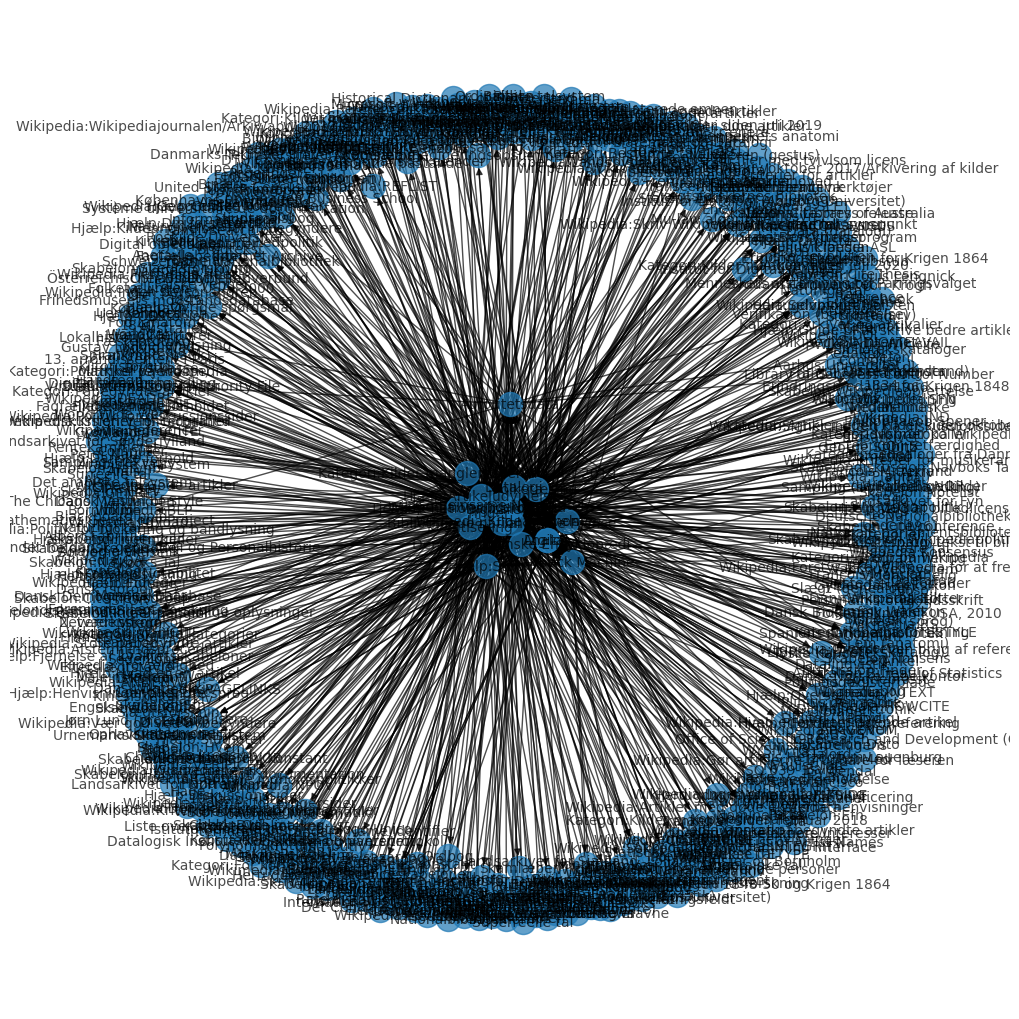

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
nx.draw_spring(G, with_labels=True, font_size=10, alpha=0.7)
plt.show()


Nodes with High Betweenness Centrality: ['Digitalisering', 'Autoritetsdata', 'Gemeinsame Normdatei', 'Tal', 'Datalogi', 'Bibliothèque nationale de France', 'Den Store Danske Encyklopædi', 'Finger', 'Folketælling', 'Kvantisering']


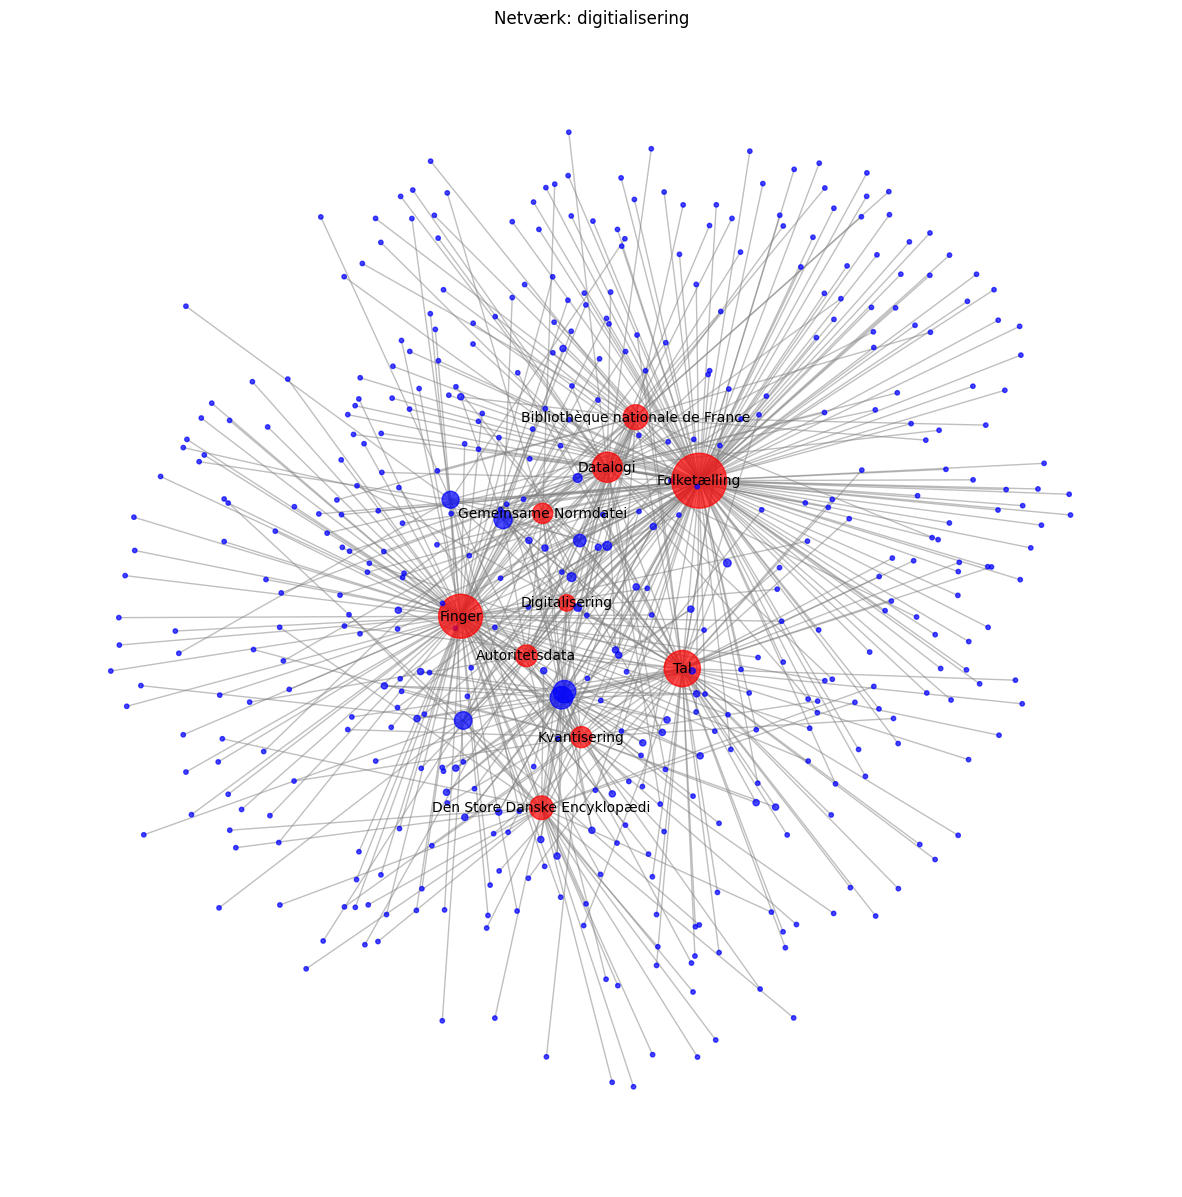

In [100]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph(G)  # Vi sikre os at der ikke er "self-loops" eller "multiple edges"

# Udregn betweenness centrality med indbygget metode
betweenness_centrality = nx.betweenness_centrality(G)

# Sorter centralitets værdierne og sæt et skæringspunkt for top 10 centrale artikler
sorted_centrality = sorted(betweenness_centrality.values(), reverse=True)
if len(sorted_centrality) > 10:       # Undgå indekseringfejl
    threshold = sorted_centrality[9]  # 10. højeste værdi for top 10
else:
    threshold = 0                     # Hvis der er færre end 10 noder, sættes skæring til 0

# Identificer noder med høj centralitet
high_centrality_nodes = [node for node, centrality in betweenness_centrality.items() if centrality >= threshold]

# Print noder med høj centralitet
print("Nodes med høj Betweenness Centrality:", high_centrality_nodes)

# Anvend spring layout: se https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Sæt node-størrelsen baseret på degree
node_sizes = [G.degree(node) * 10 for node in G.nodes()]
edge_colors = ['gray' for _ in G.edges()]

# Highlight noder med høj centralitetsværdier
node_colors = ['red' if node in high_centrality_nodes else 'blue' for node in G.nodes()]

# Plot figur
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color=edge_colors)

# Tilføj labels til noder med høj centralitet
labels = {node: str(node) for node in high_centrality_nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_color='black', font_size=10)

plt.title('Netværk: digitialisering')
plt.axis('off')  # Fjern akser
plt.show()


### Fjern noder

In [101]:

# Print the original nodes
print("Original Nodes:", list(G.nodes()))

# Define the patterns to remove
patterns_to_remove = ["Wikipedia:", "Hjælp:", "Kategori:", "Bibliothèque nationale de France", "Den Store Danske Encyklopædi"]

# Find and remove nodes that match the patterns
nodes_to_remove = [node for node in G.nodes() if any(node.startswith(pattern) for pattern in patterns_to_remove)]

# Remove the identified nodes
G.remove_nodes_from(nodes_to_remove)

# Print the remaining nodes
print("Remaining Nodes:", list(G.nodes()))


Original Nodes: ['Digitalisering', 'Analog', "1970'erne", '2. verdenskrig', 'AD-konverter', 'Analog elektronik', 'Autoritetsdata', 'Bell Labs', 'Binære talsystem', 'Ciffer', 'Compact Disc', 'DA-konverter', 'Digital (flertydig)', 'Digital elektronik', 'Digitalisere', 'Digitalur', 'Elektronik', 'Gemeinsame Normdatei', 'George Stibitz', 'Græsk (sprog)', 'ISDN', 'Logiske kredsløb', 'Luftværn', 'Office of Scientific Research and Development (OSRD)', 'Tal', 'Telefon', 'Bibliografi', 'Biblioteks- og informationsvidenskab', 'Bibliotekskataloger', 'Bog', 'Datalogi', 'Forfatter', 'LIBRIS (bibliotekskatalog)', 'Library of Congress Control Number', 'Mathematics Genealogy Project', 'Organisation', 'Reference', 'Virtual International Authority File', 'Wayback Machine', 'WorldCat', 'Bibliothèque nationale de France', '13. arrondissement i Paris', '1537', 'BIBSYS', 'Frankrig', 'Frans 1. af Frankrig', 'Fransk (sprog)', 'Franske Revolution', 'François Mauriac', 'François Mitterrand', 'International Stan

Nodes with High Betweenness Centrality: ['Digitalisering', 'Autoritetsdata', 'Gemeinsame Normdatei', 'Tal', 'Datalogi', 'Library of Congress Control Number', 'Wayback Machine', 'Finger', 'Folketælling', 'Kvantisering']


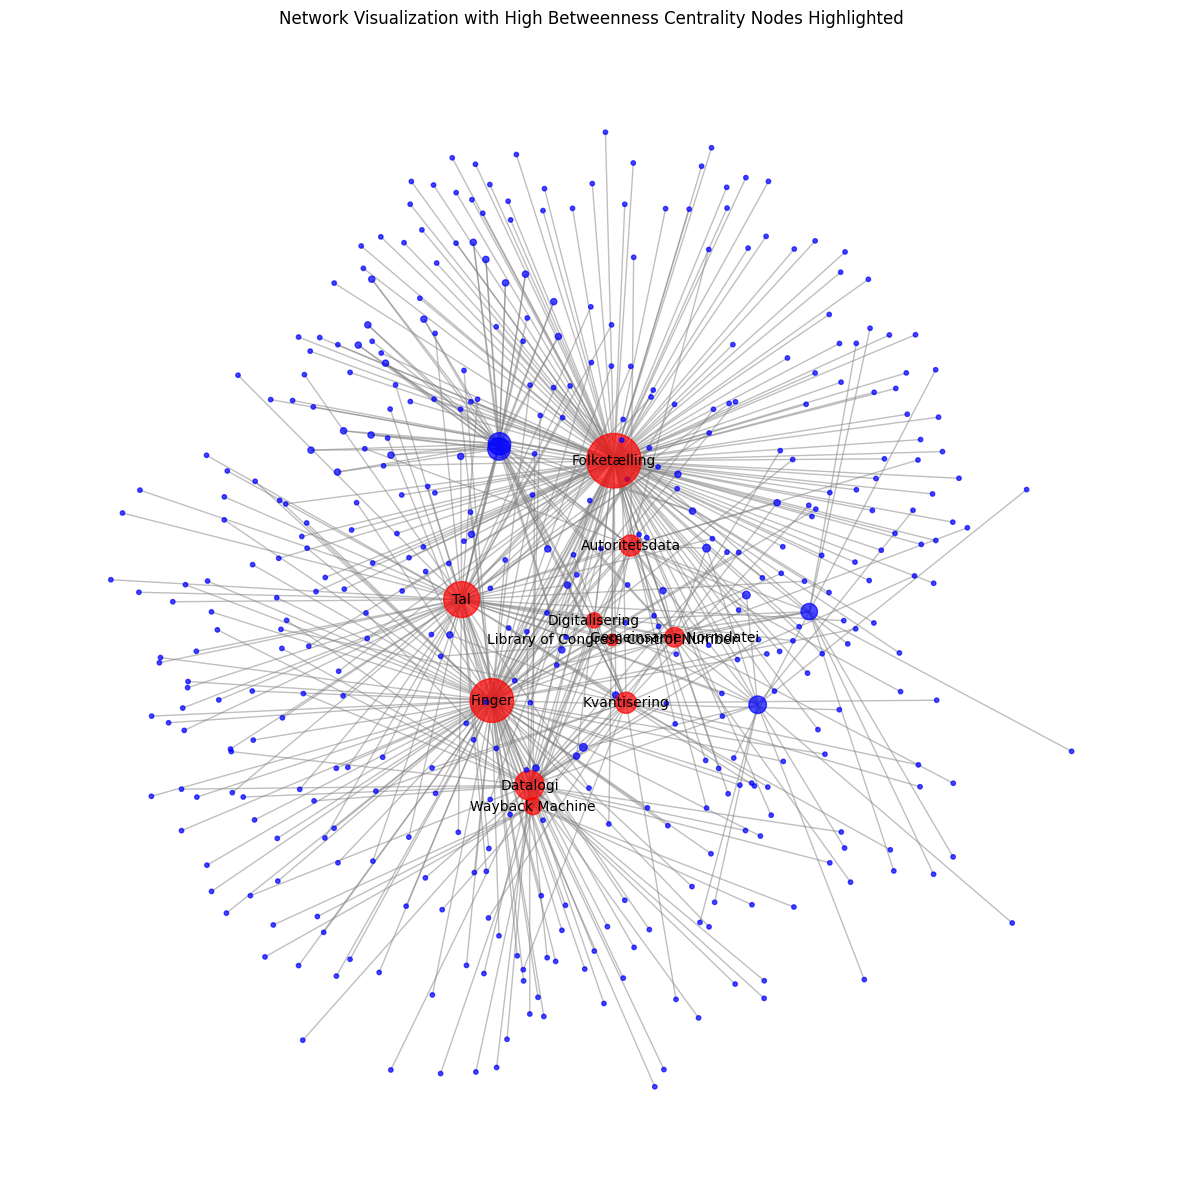

In [102]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph(G)  # Vi sikre os at der ikke er "self-loops" eller "multiple edges"

# Udregn betweenness centrality med indbygget metode
betweenness_centrality = nx.betweenness_centrality(G)

# Sorter centralitets værdierne og sæt et skæringspunkt for top 10 centrale artikler
sorted_centrality = sorted(betweenness_centrality.values(), reverse=True)
if len(sorted_centrality) > 10:       # Undgå indekseringfejl
    threshold = sorted_centrality[9]  # 10. højeste værdi for top 10
else:
    threshold = 0                     # Hvis der er færre end 10 noder, sættes skæring til 0

# Identificer noder med høj centralitet
high_centrality_nodes = [node for node, centrality in betweenness_centrality.items() if centrality >= threshold]

# Print noder med høj centralitet
print("Nodes med høj Betweenness Centrality:", high_centrality_nodes)

# Anvend spring layout: se https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Sæt node-størrelsen baseret på degree
node_sizes = [G.degree(node) * 10 for node in G.nodes()]
edge_colors = ['gray' for _ in G.edges()]

# Highlight noder med høj centralitetsværdier
node_colors = ['red' if node in high_centrality_nodes else 'blue' for node in G.nodes()]

# Plot figur
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color=edge_colors)

# Tilføj labels til noder med høj centralitet
labels = {node: str(node) for node in high_centrality_nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_color='black', font_size=10)

plt.title('Netværk: digitialisering')
plt.axis('off')  # Fjern akser
plt.show()


### Clustering

In [88]:
!pip install python-louvain


Nodes med høj Betweenness Centrality: ['Digitalisering', 'Autoritetsdata', 'Gemeinsame Normdatei', 'Tal', 'Datalogi', 'Library of Congress Control Number', 'Wayback Machine', 'Finger', 'Folketælling', 'Kvantisering']


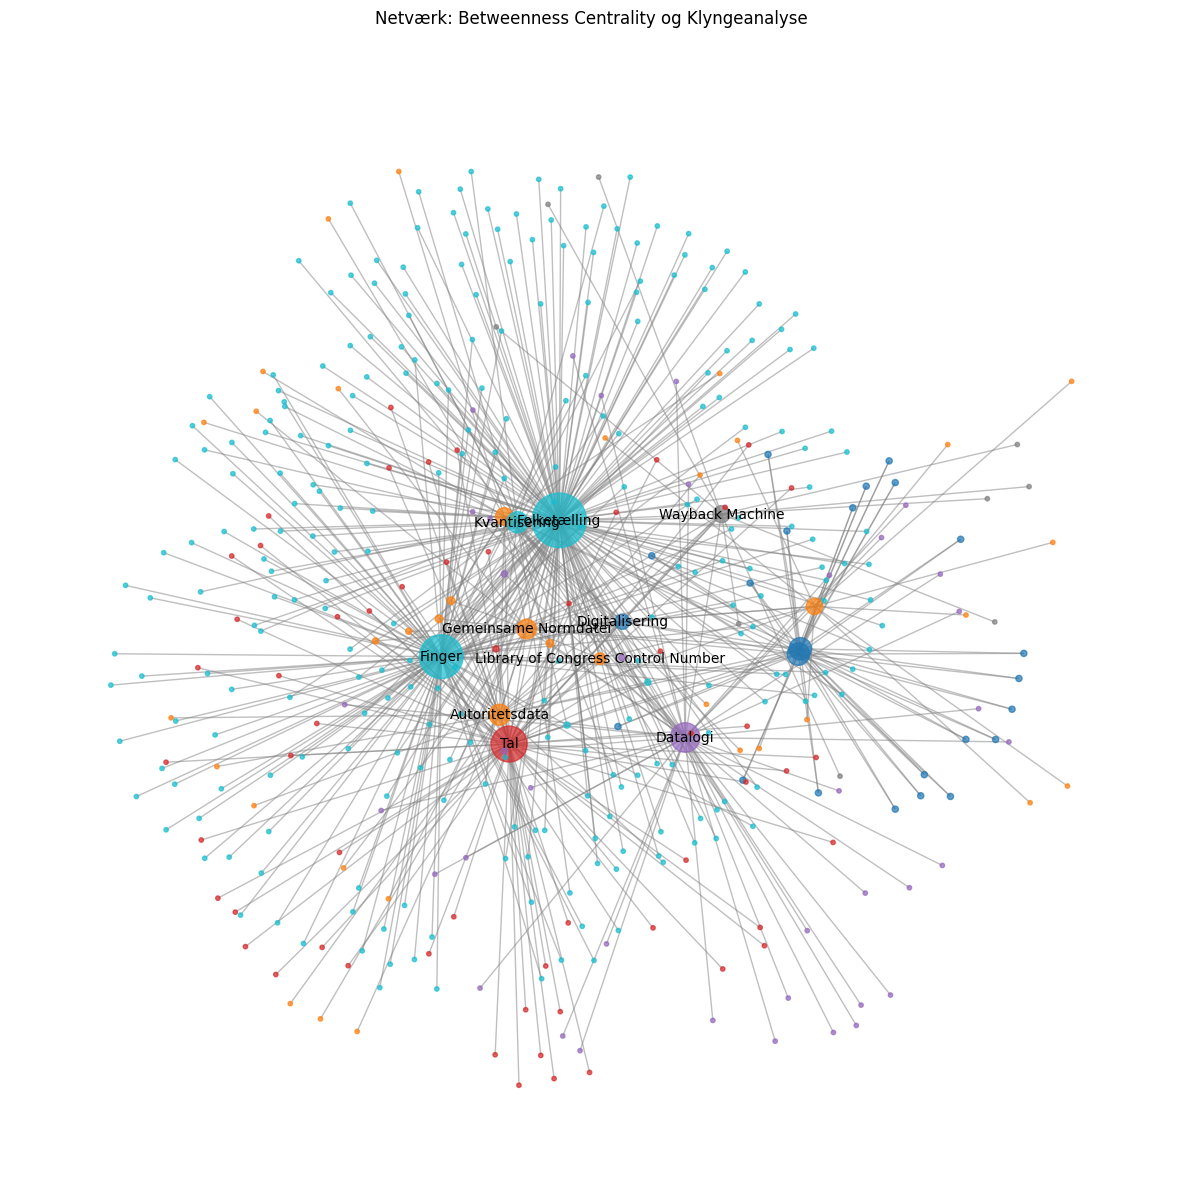

In [106]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
import numpy as np

# Opret grafen
G = nx.Graph(G)  # Sørg for at der ikke er "self-loops" eller "multiple edges"

# Udregn betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Sorter centralitets værdierne
sorted_centrality = sorted(betweenness_centrality.values(), reverse=True)
if len(sorted_centrality) > 10:
    threshold = sorted_centrality[9]
else:
    threshold = 0

# Identificer noder med høj centralitet
high_centrality_nodes = [node for node, centrality in betweenness_centrality.items() if centrality >= threshold]

# Print noder med høj centralitet
print("Nodes med høj Betweenness Centrality:", high_centrality_nodes)

# Beregn communities med Louvain-metoden
partition = community_louvain.best_partition(G)

# Anvend spring layout
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Sæt node-størrelsen baseret på degree
node_sizes = [G.degree(node) * 10 for node in G.nodes()]
edge_colors = ['gray' for _ in G.edges()]

# Generer farver for hver klynge
unique_colors = list(set(partition.values()))
color_map = plt.get_cmap("tab10")  # Vælg en colormap med flere farver
node_colors = [color_map(i % len(unique_colors)) for i in [partition[node] for node in G.nodes()]]

plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color=edge_colors)

# Tilføj labels til *alle* noder
labels = {node: str(node) for node in high_centrality_nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_color='black', font_size=10)

plt.title("Netværk: Betweenness Centrality og Klyngeanalyse")
plt.axis('off')
plt.show()


# Øvelse: Netværksanalyse med Wikipedia-data

Formålet er at lave en netværksanalyse baseret på data fra Wikipedia og analysere relationer mellem forskellige sider.

Trin til opgaven:

1. Dataindsamling:
  - Vælg en Wikipedia-side som udgangspunkt (fx "Innovation").
  - Udtræk alle interne links fra den valgte side. Disse links vil danne grundlaget for jeres netværk.
  - For hver af de fundne links, udtræk eventuelt også deres interne links for at udvide netværket.

2. Netværksopbygning:
  - Konstruer et graf-objekt, hvor hver node repræsenterer en Wikipedia-side, og hver edge repræsenterer et link mellem to sider.
  - Overvej om netværket skal være directed (pilene går fra én side til en anden) eller undirected (ingen retning på forbindelserne).

3. Beregn netværksmål:
  - Degree centrality: Identificer de sider med flest forbindelser.
  - Betweenness centrality: Find de sider, der fungerer som broer mellem forskellige temaer.
  - Klyngeanalyse: bestem de sider, der hører til samme "community".

4. Visualisering:
  - Lav en visualisering af jeres netværk, hvor noder og edges er plottet. Brug **evt.** forskellige farver eller størrelser til at repræsentere centralitet eller andre relevante mål.

5. Diskussion:
  - Kodningsparadigmer: Diskutér koden i relation til programmeringsparadigmerne OOP og FP. Hvordan understøtter networkx disse paradigmer? (Se gerne også dokumentationen til networkx)
  - Substantiel tolkning: Diskutér de beregnede mål og visualiseringen. Hvilke sider fremstår som vigtige i netværket? Hvad fortæller dette om de dominerende tematikker inden for emnet?

# **Nyt eksempel**: Netværks med egen data og introduktion til dataframes

[link](https://research-api.cbs.dk/ws/portalfiles/portal/57663543/anton_grau_larsen_and_christoph_houmann_ellersgaard_who_listens_to_the_top_acceptedversion.pdf)